En este ejemplo se realiza la combinacion de diferentes tablas utilizando las opciones:
-Merge
-Join
-Concatenate
-Compare
se utlizan las tablas relacionales del ejemplo de SQL

In [1]:
# importamos las librerias que se utilizarán

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.gridspec as gridspec
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Cargamos las tablas a utilizar

customers = pd.read_csv('../files/customers.csv')
employees = pd.read_csv('../files/employees.csv')
offices = pd.read_csv('../files/offices.csv')
orderDetails = pd.read_csv('../files/orderdetails.csv')
orders = pd.read_csv('../files/orders.csv')
payments = pd.read_csv('../files/payments.csv')
productLines = pd.read_csv('../files/productlines.csv')
products = pd.read_csv('../files/products.csv')

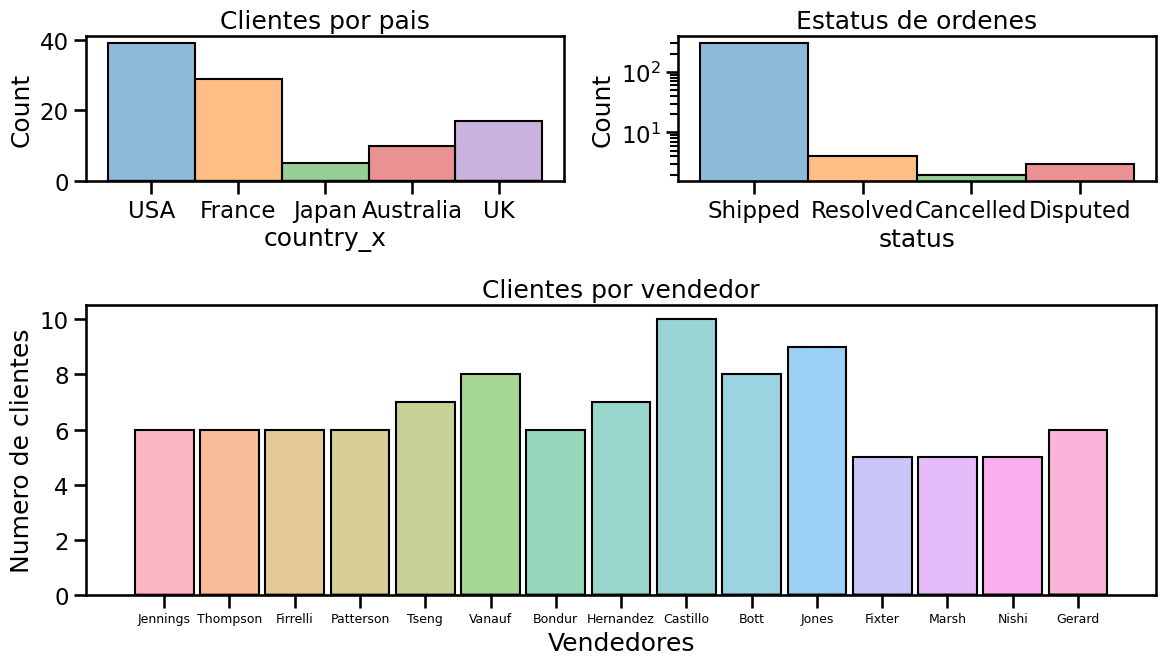

In [3]:
df_empleados_vendedores=employees.merge(customers,how='inner',left_on='employeeNumber',right_on='salesRepEmployeeNumber')
fig = plt.figure(figsize=(12,7))
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 2])
sns.color_palette("bright")
sns.set_context("talk")
ax3 = fig.add_subplot(gs[1, :])
sns.histplot(data=df_empleados_vendedores,x='lastName',discrete=True,shrink=.9,ax=ax3,hue='lastName',legend=False)
ax3.set_xlabel('Vendedores')
ax3.set_ylabel('Numero de clientes')
ax3.set_title('Clientes por vendedor')
plt.xticks(fontsize=9)

df_pais_vendedor = offices.merge(df_empleados_vendedores,how='inner',left_on='officeCode',right_on='officeCode')
ax1= fig.add_subplot(gs[0,0])
sns.histplot(data=df_pais_vendedor,x='country_x',ax=ax1,hue='country_x',legend=False)
ax1.set_title('Clientes por pais')

ax2 = fig.add_subplot(gs[0,1])
sns.histplot(data= orders, x='status',ax=ax2,hue='status',legend=False)
plt.yscale('log')
ax2.set_title('Estatus de ordenes')
plt.tight_layout()

df_productos_vendidos=orderDetails.merge(products,how='inner',left_on='productCode',right_on='productCode')
df_ordenes_pagadas = orders.merge(payments, how='inner',left_on='customerNumber',right_on='customerNumber')
df_ventas= df_productos_vendidos.merge(df_ordenes_pagadas,how='inner',left_on='orderNumber',right_on='orderNumber')